<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/qc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Computing - Miscellaneous**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_000.jpg)

In [ ]:
!pip install cirq --quiet
import cirq
import sympy
from cirq.contrib.svg import SVGCircuit
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # %matplotlib inline
print(cirq.__version__)

### **<font color="blue">Algorithms**

#### **<font color="blue">Superdense Coding**

###### **<font color="black">1 Qubit - Tensor Product of two Parallel Gates (Superposition in Multiple Qubits)**

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

The tensor product (or Kronecker product) of two quantum gates is the gate that is equal to the two gates in parallel.

In [ ]:
# Define operations
ops=[cirq.Y(a), # Superposition
     cirq.X(b), # Entanglement
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───Y───M───
          │
b: ───X───M───


*Two gates $Y$ and $X$ in parallel is equivalent to the gate $Y\otimes X$*

![ggg](https://upload.wikimedia.org/wikipedia/commons/d/d5/Parallel_quantum_logic_gates.png)

If we, as in the picture, combine the Pauli-Y gate with the Pauli-X gate in parallel, then this can be written as:

> $C=Y \otimes X=\left[\begin{array}{cc}0 & -i \\ i & 0\end{array}\right] \otimes\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]=\left[\begin{array}{ll}0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & -i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] \\ i\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right] & 0\left[\begin{array}{ll}0 & 1 \\ 1 & 0\end{array}\right]\end{array}\right]=\left[\begin{array}{cccc}0 & 0 & 0 & -i \\ 0 & 0 & -i & 0 \\ 0 & i & 0 & 0 \\ i & 0 & 0 & 0\end{array}\right]$

Both the Pauli-X and the Pauli-Y gate act on a single qubit. The resulting gate $C$ act on two qubits.

In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=10)
print('Measurement results')
print(result)

Measurement results
a,b=1111111111, 1111111111


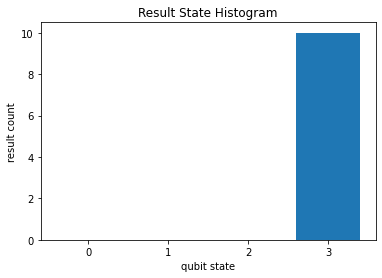

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())

In [ ]:
result.histogram(key="a,b")

Counter({3: 10})

###### **<font color="black">2 Qubits - CNOT Gate (CX) [and Controlled-U Gate]: Create Bell state (Superposition across Multiple Qubits)**

> CNOT, acting on a two-qubit term $\left|q_{1} q_{2}\right\rangle$, applies the $\mathbf{N O T}(\mathbf{X})$ gate to the second qubit only if the first qubit is in state $|1\rangle$. The first qubit controls the action on the second.

> 0 im Output wenn zwei Inputs gleich sind. 1 im Output wenn die Inputs unterschiedlich sind.

*Entanglement*

In [ ]:
cirq.unitary(cirq.CNOT)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

The [Controlled NOT gate](https://en.m.wikipedia.org/wiki/Controlled_NOT_gate) (also C-NOT or CNOT, controlled Pauli-X) is a quantum logic gate that is an essential component in the construction of a gate-based quantum computer. **It can be used to entangle and disentangle Bell states**. Any quantum circuit can be simulated to an arbitrary degree of accuracy using a combination of CNOT gates and single qubit rotations.

>$
\begin{array}{|c|c|c|c|}
\hline {\text { Before }} & {\text { Before }}& {\text { After }}& {\text { After }} \\
\hline \text { Control } & \text { Target } & \text { Control } & \text { Target } \\
\hline|0\rangle & |0\rangle & |0\rangle & |0\rangle \\
\hline|0\rangle & |1\rangle & |0\rangle & |1\rangle \\
\hline|1\rangle & |0\rangle & |1\rangle & |1\rangle \\
\hline|1\rangle & |1\rangle & |1\rangle & |0\rangle \\
\hline
\end{array}
$

A common application of the $\mathrm{C}_{\text {NOT }}$ gate is to maximally entangle two qubits into the $\left|\Phi^{+}\right\rangle$ Bell state; this forms part of the setup of the superdense coding, quantum teleportation, and entangled quantum cryptography algorithms.

CNOT or controlled Pauli-X.

* **Verschrankt zwei Qubits und invertiert das Ziel-Qubit**, wenn das Kontroll-Qubit 1 ist:

> $|00\rangle \rightarrow|00\rangle$

> $|01\rangle \rightarrow|01\rangle$

> $|10\rangle \rightarrow|11\rangle$

> $|11\rangle \rightarrow|10\rangle$

Matrix-Darstellung:

> $\left(\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{array}\right)$

The CNOT (or controlled Pauli- $X$ ) gate can be described as the gate that maps the basis states $|a, b\rangle \mapsto|a, a \oplus b\rangle$, where $\oplus$ is XOR.

**Controlled-U Gate**

More generally if $U$ is a gate that operates on single qubits with matrix representation

>$
U=\left[\begin{array}{ll}
u_{00} & u_{01} \\
u_{10} & u_{11}
\end{array}\right]
$

then the controlled-U gate is a gate that operates on two qubits in such a way that the first qubit serves as a control. 

It maps the basis states as follows:

$|00\rangle \mapsto|00\rangle$

$|01\rangle \mapsto|01\rangle$

$|10\rangle \mapsto|1\rangle \otimes U|0\rangle=|1\rangle \otimes\left(u_{00}|0\rangle+u_{10}|1\rangle\right)$

$|11\rangle \mapsto|1\rangle \otimes U|1\rangle=|1\rangle \otimes\left(u_{01}|0\rangle+u_{11}|1\rangle\right)$

The matrix representing the controlled $U$ is

>$
\mathrm{C} U=\left[\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}
\end{array}\right]
$

**When U is one of the Pauli operators, X,Y, Z, the respective terms "controlled-X", "controlled-Y", or "controlled-Z" are sometimes used**. 
Sometimes this is shortened to just CX, CY and CZ.

**Code example: Create Bell state**

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───H───M───
          │       │
b: ───────X───────M───


*More about creating Bell state from superposition & entanglement: [Demystifying Superdense Coding](https://medium.com/qiskit/demystifying-superdense-coding-41d46401910e)*

In [ ]:
# Run Simulations & Measurements
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=1110010101010110111100101011011111100100110101101101110000110001010000101011100100111110000001011001, 1100000001000011000100101011011000110101101001100111111001101000001100010010100010100100001010100000


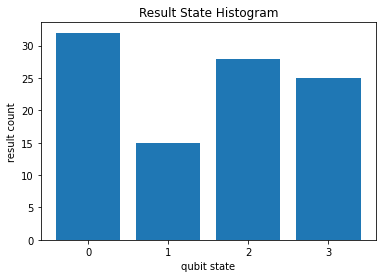

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")

Counter({0: 32, 1: 15, 2: 28, 3: 25})

**Make Bell state operations reverse**

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

*Operators are unitary*

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.CNOT(a,b),
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───@───H───M───
          │   │       │
b: ───────X───X───────M───


In [ ]:
# Run Simulations & Measurements
# Outcome should be same as step 1: 0, back to as if nothing happened
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [ ]:
result.histogram(key="a,b")

Counter({0: 100})

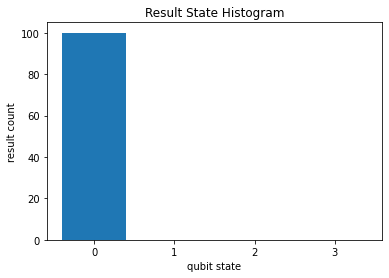

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

**Multiple Qubits: Product State vs Entangled State (Bell State)**

* As the name implies, entanglement is a property of quantum mechanical systems that only reveals itself when states begin to interact.

* When two qubits are brought together and we'd like to consider the new joint system that they form, we use a fancy new symbol: ⊗. This is called the tensor product, but really it just represents a combination of two or more quantum states.

**Product States**
* States which can be described as a tensor product of two independent superpositions are known as product states. 

A joint state of two initialized qubits can be represented as

>$|0\rangle\otimes|0\rangle$

If we apply the Hadamard gate to the first qubit, it transforms but leaves the other qubit unaffected, since the Hadamard is a single qubit gate:

>$
\mathbf{H}|0\rangle \otimes|0\rangle=\left(\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}|1\rangle\right) \otimes|0\rangle
$

**Exkurs**: wenn ein Gate bei einem Single Qubit mehr Probability als 0,5 hat, kann man das so schreiben (Achtung: Koeffizient ist Wurzel aus Probability),

> $\mathbf{H}|0\rangle\ = (0,9) * |0\rangle + (0,1) * |1\rangle$

* 0,71 ist für 50% Probability (man muss es squared nehmen!)

* 0,9 ist für 0,99 Probability

* 1 ist für 100% Probability für State 0, der andere Term hat dann 0 % und verschwindet. Es bleibt dann nur noch $|0\rangle$

The tensor product is distributive, which in this case means it acts much like multiplication:

>$
\mathbf{H}|0\rangle \otimes|0\rangle=\frac{1}{\sqrt{2}}|0\rangle \otimes|0\rangle+\frac{1}{\sqrt{2}}|1\rangle \otimes|0\rangle \text {. }
$

Using a series of single-qubit gates, we can transform two initialized qubits into two new arbitrary states:

>$
\begin{array}{l}
\text { Qubit 1: } \quad|0\rangle \rightarrow a_{1}|0\rangle+a_{2}|1\rangle \\
\text { Qubit 2: } \quad|0\rangle \rightarrow b_{1}|0\rangle+b_{2}|1\rangle .
\end{array}
$

The resulting 2 -qubit state is usually written as their product using a fancy new symbol:

>$|0\rangle
\otimes|0\rangle \rightarrow\left(a_{1}|0\rangle+a_{2}|1\rangle\right) \otimes\left(b_{1}|0\rangle+b_{2}|1\rangle\right)
$

Another way to express this would be:

> $a_{1} b_{1}|0\rangle \otimes|0\rangle+a_{1} b_{2}|0\rangle \otimes|1\rangle+a_{2} b_{1}|1\rangle \otimes|0\rangle+a_{2} b_{2}|1\rangle \otimes|1\rangle$

**Bell state (Entangled State)**

* To simplify notations, we sometimes omit the $\otimes$ sign and only **write $|00\rangle$ to denote that both the first qubit and the second qubit are in the $|0\rangle$ state**. 

* There are four total 2 -qubit combinations, including $|01\rangle=|0\rangle \otimes|1\rangle$, and so on.

With this simplified notation, a general 2 -qubit joint state can be written as an arbitrary linear combination of four 2 -qubit computational states:

>$
a|00\rangle+b|01\rangle+c|10\rangle+d|11\rangle
$

This is quite a bit different than the joint state found by preparing both qubits into independent single-qubit superpositions:

>$
\left(a_{1}|0\rangle+a_{2}|1\rangle\right) \otimes\left(b_{1}|0\rangle+b_{2}|1\rangle\right)=a_{1} b_{1}|00\rangle+a_{1} b_{2}|01\rangle+a_{2} b_{1}|10\rangle+
$

* simple and well-known joint state called the Bell state:

> $\frac{1}{\sqrt{2}}|00\rangle+\frac{1}{\sqrt{2}}|11\rangle$

* you can NOT write the Bell state as a product of two single-qubit states

Entangled States
* The Bell state is the prototypical example of an entangled state. 
* Two qubits which are entangled can never be separated into two independent states: their coefficients are a tangled-up mess:

> $|\psi\rangle_{\text {Bell }}=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_036.jpg)

* We can contrast this with n-qubit product states, where the state of every qubit is known and they have only 2n independent amplitudes. This is a vast difference! 

* This means that most of the n-qubit space is populated by entangled states, ones that can't be written as a simple product of its components.

* We will see in a bit that with only two parameterized gates, we could transform an initialized qubit into any possible single qubit state on the surface of the Bloch sphere:

> $\mathcal{R}_{\phi} \mathcal{R}_{\theta}|0\rangle=a_{1}|0\rangle+a_{2}|1\rangle$

**How to get to an Entanglement Circuit?**

To start, we can prepare two qubits in the $|0\rangle$ state. At this point there's no connection between them, and we can write them in the product state $|\psi\rangle=$
$|0\rangle \otimes|0\rangle$ which is the same as $|00\rangle$.

Comparing $|\psi\rangle$ to the Bell state, we see that at some point along the way, we'll need to get into a superposition. Using the set of gates we currently have at our disposal $(\mathbf{X}, \mathbf{Z}, \mathbf{H})$, there doesn't appear to be a single gate that we can apply to take us from $|\psi\rangle$ to $\left|\psi_{\text {Bell }}\right\rangle .$ Naively, it seems that we have two tasks ahead of
us:

1. Getting $|\psi\rangle$ into a superposition.

2. Adjusting the individual kets so that we're in the Bell state.

At the moment we have the Hadamard, which can move one of our qubits into superposition. For argument's sake, let's apply it to the first qubit:
$$
\begin{aligned}
\mathbf{H}_{1}|\psi\rangle &=(\mathbf{H}|0\rangle) \otimes|0\rangle \\
&=\frac{|0\rangle+|1\rangle}{\sqrt{2}} \otimes|0\rangle \\
&=\frac{|00\rangle+|10\rangle}{\sqrt{2}} .
\end{aligned}
$$

Now we need to find gates that allow us to coordinate action on two qubits.

While single qubit gates like $\mathbf{X}$ and $\mathbf{H}$ can't get us all the way to the Bell state, we'd still like to keep our gate set as simple as possible. In this spirit, let's stick with the Hadamard gate to perform our superposition, and look for a multiqubit gate $\mathrm{M}$ that can get us the rest of the way:

> $
\frac{|00\rangle+|10\rangle}{\sqrt{2}} \stackrel{\mathrm{M}}{\longrightarrow} \frac{|00\rangle+|11\rangle}{\sqrt{2}}
$

**Die erste Spalte mit 0 und 1 (links jeweils) zeigt, dass dieses Qubit in einer Superposition ist mit 50% Probability von 0 und 1, während das zweite Qubit (jeweils rechts) 0 und 0 ist, weil es sich nich im initialen Zustand befindet, der immer 100% 0 ist!**

Following behaviors would make for a suitable multi-qubit gate M:

* Flip qubit 2 whenever qubit 1 and qubit 2 are opposite

* Flip qubit 2 if qubit 1 is in state ∣1⟩

* we need to keep the core principle of quantum mechanics — reversibility!

Consider the action of $\mathbf{M}$ on the two-qubit basis states: if a $|11\rangle$ term appears in the quantum state after we apply $\mathrm{M}$, we can't tell if it's because we started with a $|11\rangle$ term, or if it's because we started with a $|10\rangle$ term.

The preferred entangling gate, called CNOT (controlled NOT), gets us into the Bell state while respecting the reversibility condition:
$$
\begin{array}{l}
|00\rangle \stackrel{\text { CNOT }}{\longrightarrow}|00\rangle \\
|01\rangle \stackrel{\text { CNOT }}{\longrightarrow}|01\rangle \\
|10\rangle \stackrel{\text { CNOT }}{\longrightarrow}|11\rangle \\
|11\rangle \stackrel{\text { CNOT }}{\longrightarrow}|10\rangle .
\end{array}
$$

> CNOT, acting on a two-qubit term $\left|q_{1} q_{2}\right\rangle$, applies the $\mathbf{N O T}(\mathbf{X})$ gate to the second qubit only if the first qubit is in state $|1\rangle$. The first qubit controls the action on the second.

This enables us to prepare the entangled Bell state and is a subroutine

> $\frac{|10\rangle+|00\rangle}{\sqrt{2}} \stackrel{\text { CNOT }}{\longrightarrow} \frac{|11\rangle+|00\rangle}{\sqrt{2}}$

**For Quantum Cryptography**

* But Alice and Bob aren't stuck with the computational basis: **the Bell state is entangled no matter what basis we use to analyze it**. This is particularly easy to see by switching to the Hadamard basis. 

* As we showed before, the Bell state has the same form in the computational basis as it does in the Hadamard basis:

> $\left|\psi_{\text {Bell }}\right\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}=\frac{|--\rangle+|++\rangle}{\sqrt{2}}$

* So, Alice and Bob are free to use either basis to coordinate their bits.

*If Alice measures her qubit using the Hadamard basis, what are the possibilities for Bob's measurement in the computational basis?*

![gg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_037.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_038.jpg)

**CNOT Gate and Entanglement**

Quantum states $|\psi\rangle$ aren't always one of the computational basis states. 

In general, they can also be (ignoring normalization factors)

>$
|+\rangle=|0\rangle+|1\rangle
$

or

>$
|-\rangle=|0\rangle-|1\rangle \text {. }
$

*What does the CNOT gate do with these input states?*

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_039.jpg)

###### **<font color="black">2 Qubits - H, CNOT & X-Gate: Superdense Coding for Quantum Communication**

Superdense Coding is a method to transmit two classical bits of information by sending only one qubit of information. This is accomplished by pre-sharing an entangled state between the sender and the receiver. This entangled state allows the receiver of the one qubit of information to decode the two classical bits that were originally encoded by the sender.

*Complete example from Cirq*

In [ ]:
def make_superdense_circuit():
    circuit = cirq.Circuit()
    q0, q1, q2, q3, q4 = cirq.LineQubit.range(5)

    # Randomly sets q0 and q1 to either 0 or 1
    circuit.append([cirq.H(q0), cirq.H(q1)])
    circuit.append(cirq.measure(q0, q1, key="input "))

    # Creates Bell State to be shared on q2 and q4
    circuit.append([cirq.H(q2), cirq.CNOT(q2, q4)])
    # Step 1 of encoding (controlled NOT gate on q1 / q2)
    circuit.append(cirq.CNOT(q1, q2))
    # Step 2 of encoding (controlled Z gate on q0 / q2)
    circuit.append(cirq.CZ(q0, q2))
    # Sends encoded information to receiver
    circuit.append(cirq.SWAP(q2, q3))
    # Step 1 of decoding (controlled NOT gate on q3 and q4)
    circuit.append(cirq.CNOT(q3, q4))
    # Step 2 of decoding (Hadamard gate on q3)
    circuit.append(cirq.H(q3))
    # Measurement by receiver to decode bits
    circuit.append(cirq.measure(q3, q4, key="output"))

    return circuit


def main():
    circuit = make_superdense_circuit()
    print("Circuit:")
    print(circuit)

    sim = cirq.Simulator()
    results = sim.run(circuit, repetitions=20)
    print("\nResults:")
    print(results)


if __name__ == '__main__':
    main()

Circuit:
0: ───H───M('input ')───────@─────────────────────────────
          │                 │
1: ───H───M─────────────@───┼─────────────────────────────
                        │   │
2: ───H───@─────────────X───@───×─────────────────────────
          │                     │
3: ───────┼─────────────────────×───@───H───M('output')───
          │                         │       │
4: ───────X─────────────────────────X───────M─────────────

Results:
input =10000010110011111010, 11010101010110111000
output=10000010110011111010, 11010101010110111000


*Step by Step Walkthrough*

In [ ]:
# Create Vanilla Qubits
# Named Qubit
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

#Line-Qubit
qubits = cirq.LineQubit.range(2)

https://medium.com/qiskit/demystifying-superdense-coding-41d46401910e

*Now adding Pauli X gate to alter outcome*

In [ ]:
# Define operations
ops=[cirq.H(a), # Superposition
     cirq.CNOT(a,b), # Entanglement
     cirq.X(a), # Pauli X gate -> changes outcome from 00 to 01
     cirq.CNOT(a,b),
     cirq.H(a),
     cirq.measure(a,b)] # Measurement

# Build circuit
circuit=cirq.Circuit(ops)

print(circuit)

a: ───H───@───X───@───H───M───
          │       │       │
b: ───────X───────X───────M───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit,repetitions=100)
print('Measurement results')
print(result)

Measurement results
a,b=0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000, 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


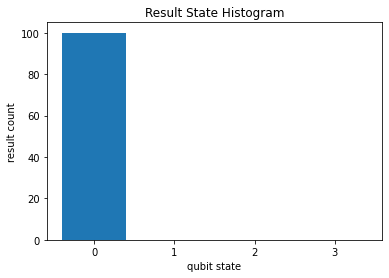

In [ ]:
# Visualization
# After doing that, you should see the quantum state become ∣00⟩+∣11⟩
_ = cirq.vis.plot_state_histogram(result) #, plt.subplot())
# https://quantumai.google/cirq/tutorials/state_histograms

In [ ]:
result.histogram(key="a,b")

Counter({1: 100})

#### **<font color="blue">Simple Addition with Qubits**

**Task 2: Addition of 1 + 1 = 2 (10 in binary)**

https://qiskit.org/textbook/ch-states/atoms-computation.html#adder

0+0 = 00 (in decimal, this is 0+0=0)

0+1 = 01 (in decimal, this is 0+1=1)

1+0 = 01 (in decimal, this is 1+0=1)

1+1 = 10 (in decimal, this is 1+1=2)

This is called a half adder. If our computer can implement this, and if it can chain many of them together, it can add anything.



In [ ]:
# Create Circuit object
circuit = cirq.Circuit()

# Define 2 qubits - They start with 0 (if you measure no, you'll see a 0 in both)
(q0, q1, q2, q3) = cirq.LineQubit.range(4)

# We flip q0 from 0 to 1 with Pauli-X 
circuit.append([cirq.X(q0)]) 

# We flip q1 from 0 to 1 with Pauli-X 
circuit.append([cirq.X(q1)]) 

# CNOT (Controlled Pauli X) for input q2 and target q0 (0 is same, 1 if different for target)
# since q2 is 0 and q0 is 1, result will stay 1
circuit.append([cirq.CNOT(q0, q2)])

# CNOT (Controlled Pauli X) for input q2 and target q1 (0 is same, 1 if different for target)
# since q2 is 0 and q1 is 1, result will stay 1
circuit.append([cirq.CNOT(q1, q2)])

# Toffoli (CCNOT) gate on q3 (if both inputs are equal, write 1, else 0) (perform a NOT on target qubit when both controls are in state 1)
circuit.append([cirq.CCX(q0, q1, q3)])

# Measure output quantum bits q2 and q3
circuit.append([cirq.measure(q2), cirq.measure(q3)])

# See what circuit has been produced (optional)
print(circuit)

                  ┌──┐
0: ───X───@────────@─────────
          │        │
1: ───X───┼───@────@─────────
          │   │    │
2: ───────X───X────┼M────────
                   │
3: ────────────────X─────M───
                  └──┘


In [ ]:
# Step 6: Perform simulation of the circuit
sim = cirq.Simulator()
results = sim.run(circuit, repetitions=10)
print(results)

2=0000000000
3=1111111111


> Read from rightmost qubit first (q3) and then next left (q2): result is 10 (binary) = 2 in decimal

#### **<font color="orange">Quantum Counting**

**In quantum counting, we simply use the quantum phase estimation algorithm to find an eigenvalue of a Grover search iteration.**

https://qiskit.org/textbook/ch-algorithms/quantum-counting.html

* [Quantum counting algorithm](https://en.m.wikipedia.org/wiki/Quantum_counting_algorithm) is a quantum algorithm for efficiently counting the number of solutions for a given search problem. The algorithm is based on the quantum phase estimation algorithm and on Grover's search algorithm.

* Counting problems are common in diverse fields such as statistical estimation, statistical physics, networking, etc. As for quantum computing, the ability to perform quantum counting efficiently is needed in order to use Grover's search algorithm (because running Grover's search algorithm requires knowing how many solutions exist). Moreover, this algorithm solves the quantum existence problem (namely, deciding whether any solution exists) as a special case.

* The algorithm was devised by Gilles Brassard, Peter Høyer and Alain Tapp in 1998.

#### **<font color="orange">Quantum Walk**

* [Quantum walks](https://en.m.wikipedia.org/wiki/Quantum_walk) are quantum analogues of classical random walks. In contrast to the classical random walk, where the walker occupies definite states and the randomness arises due to stochastic transitions between states, in quantum walks randomness arises through: 

  (1) quantum superposition of states, 
  
  (2) non-random, reversible unitary evolution and 
  
  (3) collapse of the wave function due to state measurements.

As with classical random walks, quantum walks admit formulations in both discrete time and continuous time.

* Quantum walks are motivated by the widespread use of classical random walks in the design of randomized algorithms, and are part of several quantum algorithms. For some oracular problems, quantum walks provide an exponential speedup over any classical algorithm.

* Quantum walks also give polynomial speedups over classical algorithms for many practical problems, such as the element distinctness problem, the triangle finding problem, and evaluating NAND trees. The well-known Grover search algorithm can also be viewed as a quantum walk algorithm

* Quantum walks exhibit very different features from classical random walks. In particular, they do not converge to [limiting distributions](https://en.m.wikipedia.org/wiki/Asymptotic_distribution) and due to the power of quantum interference they may spread significantly faster or slower than their classical equivalents.

*Continuous-time quantum walks*

* [Continuous-time quantum walks](https://en.m.wikipedia.org/wiki/Continuous-time_quantum_walk) arise when one replaces the continuum spatial domain in the Schrödinger equation with a discrete set.

* Under particular conditions, continuous-time quantum walks can provide a model for universal quantum computation.

###### **<font color="blue">Exkurs: Qumodes, Qudits and Qutrits</font>**

**<font color="blue">Qumodes</font>**

(CV systems / continuous spectra in infinite-dimensional Hilbert space)

https://strawberryfields.ai/photonics/concepts/photonics.html

**<font color="blue">Qudits and Qutrits</font>**

https://en.m.wikipedia.org/wiki/Qutrit

https://en.m.wikipedia.org/wiki/Qubit#Qudits_and_qutrits

#### **<font color="orange">Further QFT-based Subroutines (Deutsch, Bernstein, Simon)**

###### **<font color="blue">Deutsch–Jozsa</font>**

https://jonathan-hui.medium.com/qc-quantum-algorithm-with-an-example-cf22c0b1ec31

Allgemein Oracel: https://towardsdatascience.com/the-quantum-oracle-demystified-65e8ffebd5d5

> Constant or balanced?

* nutzt Quantum Fourier Transform

There are four different possible functions:
* Function f_0 always returns 0.
* Function f_1 returns 0 if the input is 0 and it returns 1 if the input is 1.
* Function f_2 returns 1 if the input is 0 and it returns 0 if the input is 1.
* Function f_3 always returns 1.

Task: 
* Send a number of several numbers to determine, if the function is a constant or a balanced?
* f_0 und f_3 constant, f_1 und f_2 balanced
* classical needs at least 2 numbers (0,1), quantum needs just 1 number to solve this

https://towardsdatascience.com/how-to-solve-a-problem-with-quantum-computing-4b04f3f882d9

https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html

https://medium.com/quantum-untangled/quantum-untangled-quantum-computing-deutsch-jozsa-algorithm-guide-untangled-27adf4205913

https://medium.com/quantum-untangled/the-deutsch-jozsa-algorithm-math-circuits-and-code-quantum-algorithms-untangled-f3b28be4cfd3

https://en.m.wikipedia.org/wiki/Deutsch–Jozsa_algorithm

###### **<font color="blue">Bernstein–Vazirani algorithm</font>**

> What is a string?

https://en.m.wikipedia.org/wiki/Bernstein–Vazirani_algorithm

###### **<font color="blue">Simon's problem</font>**

https://jonathan-hui.medium.com/qc-simons-algorithm-be570a40f6de

> 1-1 or 2-1 ?

https://en.m.wikipedia.org/wiki/Simon%27s_problem

###### **<font color="blue">Boson sampling problem ('Aaronson–Arkiphov Scheme')</font>**

https://www.nature.com/articles/d41586-020-03434-7

The Hefei team, led by Pan and Chao-Yang Lu, chose a different problem for its demonstration, called boson sampling. It was devised in 2011 by two computer scientists, Scott Aaronson and Alex Arkhipov4, then at the Massachusetts Institute of Technology in Cambridge. It entails calculating the probability distribution of many bosons — a category of fundamental particle that includes photons — whose quantum waves interfere with one another in a way that essentially randomizes the position of the particles. The probability of detecting a boson at a given position can be calculated from an equation in many unknowns.

###### **<font color="blue">Quantum Minimization Algorithm (QMA)**

* Quantum algorithm for solving discrete functions minimization problems was introduced in. It is based on Grover’s search and can be represented in terms of quantum iterations circuits.

* Such algorithm allows us to find global optimum as it is always searching through all possible inputs states

* Christoph, D. and Hoyer, P. "A quantum algorithm for finding the minimum", arXiv:quant-ph/9607014 (1-2, 1996) https://arxiv.org/abs/quant-ph/9607014

* https://arxiv.org/pdf/1906.10175.pdf

### **<font color="orange">BQP: bounded-error quantum polynomial time**

https://www.quantamagazine.org/new-quantum-algorithms-finally-crack-nonlinear-equations-20210105/

#### **<font color="black">Quantum Simulation**

... (Monte Carlo, Quantum Chemistry, Materials Science and more)


###### **<font color="blue">Quantum Simulators**

https://en.wikipedia.org/wiki/Quantum_chemistry

https://en.m.wikipedia.org/wiki/Quantum_simulator

https://de.wikipedia.org/wiki/Quantensimulation

quantum chemistry: https://www.youtube.com/watch?v=2XEjrwWhr88

How is Quantum Phase Estimation applied to Quantum Chemistry calculations: in Quantum Chemistry you are interested in dynamics = time evolution. QPE is helping us to ...so Hamiltonian dynamics is unitary, and so you can use that unitary that comes from your Hamiltonian to do simulations in chemistry.

* Many important problems in physics, especially [low-temperature physics](https://en.m.wikipedia.org/wiki/Thermodynamics) and [many-body physics](https://en.m.wikipedia.org/wiki/Many-body_theory), remain poorly understood because the underlying quantum mechanics is vastly complex. See also [Condensed_matter_physics](https://en.m.wikipedia.org/wiki/Condensed_matter_physics) (incl. crystallography etc)

* Conventional computers, including supercomputers, are inadequate for simulating quantum systems with as few as 30 particles. Better computational tools are needed to understand and **rationally design materials whose properties are believed to depend on the collective quantum behavior of hundreds of particles**.

* Quantum simulators provide an alternative route to understanding the properties of these systems. These simulators create clean realizations of specific systems of interest, which allows precise realizations of their properties. Precise control over and broad tunability of parameters of the system allows the influence of various parameters to be cleanly disentangled.

* Quantum simulators can solve problems which are difficult to simulate on classical computers **because they directly exploit quantum properties of real particles**. In particular, they exploit a property of quantum mechanics called superposition, wherein a quantum particle is made to be in two distinct states at the same time, for example, aligned and anti-aligned with an external magnetic field. Crucially, simulators also take advantage of a second quantum property called entanglement, allowing the behavior of even physically well separated particles to be correlated.



###### **<font color="blue">Stochastic Processes and Monte Carlo Simulations**

https://en.m.wikipedia.org/wiki/Quantum_Monte_Carlo

https://en.wikipedia.org/wiki/Quantum_Markov_chain

https://www.nature.com/articles/s41534-021-00459-2

Quantum Gaussian Process Algorithm (QGPA): https://arxiv.org/pdf/1803.10520.pdf

###### **<font color="blue">Hybrid: Variational quantum eigensolver (i.e. Protein Folding)**

The VQE algorithm applies classical optimization to minimize the energy expectation of an ansatz state to find the ground state energy of a molecule. This can also be extended to find excited energies of molecules.

*Optimization: simulations for material science and quantum chemistry, factoring numbers*

* Known as variational quantum algorithms, they use the quantum boxes to manipulate quantum systems while shifting much of the work load to classical computers to let them do what they currently do best: solve optimization problems.

* "With variational quantum algorithms, we get the best of both worlds. We can harness the power of quantum computers for tasks that classical computers can't do easily, then use classical computers to compliment the computational power of quantum devices."

* The algorithms are called variational because the optimization process varies the algorithm on the fly, as a kind of machine learning. It changes parameters and logic gates to minimize a cost function, which is a mathematical expression that measures how well the algorithm has performed the task. The problem is solved when the cost function reaches its lowest possible value. 

* In an iterative function in the variational quantum algorithm, the quantum computer estimates the cost function, then passes that result back to the classical computer. The classical computer then adjusts the input parameters and sends them to the quantum computer, which runs the optimization again. 



https://phys-org.cdn.ampproject.org/c/s/phys.org/news/2021-08-algorithms-small-noisy-quantum-viable.amp

https://www.nature.com/articles/s42254-021-00348-9

*Resource-efficient quantum algorithm for protein folding*

* Rather than spend computational resources checking each possible fold of a protein, the quantum approach encodes the superposition of all physically meaningful ways of folding the protein into a model Hamiltonian. Then it samples these combinations statistically to find the series of folds that are the most stable.

* “Everything in our body wants to be in the minimum free-energy configuration,” said Barkoutsos. “It is the most stable. And we generally say in nature — in our bodies — the most stable is the winning configuration.”
With this approach, the researchers simulated the folding of a 10-amino acid chain called Angiotensin with a 22 qubit quantum simulator, and a seven-amino acid neuropeptide on a 20-qubit quantum computer.
Multipurpose, open-source code

* This work relied on a modified Variational Quantum Eigensolver (VQE) algorithm, a major optimization tool in the quantum arsenal, drawn from the Qiskit Application Module.

* To suit their needs, the team modified the VQE to sample only the parts of the data relevant to the problem, producing a tool they called a Conditional Value-at-Risk (CVaR) VQE. In line with IBM Quantum’s open-source ethos, this tool is now available to the Qiskit community as of the latest Qiskit Nature release.

https://medium.com/qiskit/a-novel-quantum-algorithm-for-protein-folding-paving-the-way-toward-resolving-one-of-the-biggest-861112139ff0

https://www.nature.com/articles/s41534-021-00368-4

#### **<font color="black">Quantum Linear Algebra & Optimization (Solving a Linear Systems of Equations)**

... Quantum Optimization & Quantum Linear Algebra 

In 2009 Aram Harrow, Avinatan Hassidim, and Seth Lloyd, formulated a quantum algorithm for solving linear systems. The algorithm estimates the result of a scalar measurement on the solution vector to a given linear system of equations. 

Provided the linear system is a sparse and has a low condition number $\kappa$, and that the user is interested in the result of a scalar measurement on the solution vector, instead of the values of the solution vector itself, then the algorithm has a runtime of $O\left(\log (N) \kappa^{2}\right)$, where $N$ is the number of variables in the linear system. This offers an exponential speedup over the fastest classical algorithm, which runs in $O(N \kappa)$ (or $O(N \sqrt{\kappa})$ for positive semidefinite matrices).

https://en.wikipedia.org/wiki/Quantum_algorithm_for_linear_systems_of_equations

https://en.wikipedia.org/wiki/Quantum_optimization_algorithms

###### **<font color="blue">Quantum Power Iteration & Inverse Iteration**

* used for Eigenvalue calculation in large matrices

* [Power iteration (Eigenvalues)](https://en.m.wikipedia.org/wiki/Power_iteration) und [Inverse Iteration (Eigenvector)](https://en.m.wikipedia.org/wiki/Inverse_iteration)

* [Quantum Power Method by a Superposition of Time-Evolved States](https://arxiv.org/abs/2008.03661)

###### **<font color="blue">Quantum Multiplication</font>**

* **Boost Multiplication of Karatsuba with Quantum Computers**: In his new paper, Gidney describes a quantum way of implementing Karatsuba multiplication that doesn’t impose huge memory costs. Instead of generating intermediate values to produce a final value, he uses a method called “tail call optimization” to directly mutate inputs to outputs. 

* This allows the algorithm to avoid creating intermediate information that a quantum computer can never discard. “He gets rid of the issue of having to deal with extra qubits by not having extra qubits,” said Thomas Wong, a quantum information scientist at Creighton University.Gidney expects that his method will work for adapting many classical recursive algorithms to quantum computers. 

[A New Approach to Multiplication Opens the Door to Better Quantum Computers](https://www.quantamagazine.org/a-new-approach-to-multiplication-opens-the-door-to-better-quantum-computers-20190424/)

###### **<font color="blue">Harrow-Hassidim-Lloyd Algorithm (HHL)</font>**

The [quantum algorithm for linear systems of equations](https://en.m.wikipedia.org/wiki/Quantum_algorithm_for_linear_systems_of_equations), also called HHL algorithm, designed by Aram Harrow, Avinatan Hassidim, and Seth Lloyd, is a quantum algorithm formulated in 2009 for solving linear systems. The algorithm estimates the result of a scalar measurement on the solution vector to a given linear system of equations.

* The algorithm is one of the main fundamental algorithms expected to provide a speedup over their classical counterparts, along with Shor's factoring algorithm, Grover's search algorithm, the quantum fourier transform and quantum simulation. 

* Provided the linear system is sparse and has a low condition number $\kappa_{1}$ and that the user is interested in the result of a scalar measurement on the solution vector, instead of the values of the solution vector itself, then the algorithm has a runtime of $O\left(\log (N) \kappa^{2}\right)$, where $N$ is the number of variables in the linear system. This offers an exponential speedup over the fastest classical algorithm, which runs in $O(N \kappa)$ (or $O(N \sqrt{\kappa})$ for positive semidefinite matrices).

https://www.quantamagazine.org/a-new-approach-to-multiplication-opens-the-door-to-better-quantum-computers-20190424/

https://www.quantamagazine.org/teenager-finds-classical-alternative-to-quantum-recommendation-algorithm-20180731/

https://medium.com/mit-6-s089-intro-to-quantum-computing/hhl-solving-linear-systems-of-equations-with-quantum-computing-efb07eb32f74

* Systems of linear equations arise naturally in many real-life applications in a wide range of areas, such as in the solution of Partial Differential Equations, the calibration of financial models, fluid simulation or numerical field calculation. 

* Makes use of Quantum Phase Estimation

* Quantum Matrix Inversion

* Given a matrix $A \in \mathbb{C}^{N \times N}$ and a vector $\vec{b} \in \mathbb{C}^{N}$, find $\vec{x} \in \mathbb{C}^{N}$ satisfying $A \vec{x}=\vec{b}$

* one crucial remark to keep in mind is that the classical algorithm returns the full solution, while the HHL can only approximate functions of the solution vector.

* **Used in many quantum machine learning algorithms as a building block**


https://m.youtube.com/watch?v=Xvp56xeNZo4

https://m.youtube.com/watch?v=hQpdPM-6wtU

https://qiskit.org/textbook/ch-applications/hhl_tutorial.html

https://en.m.wikipedia.org/wiki/Quantum_algorithm_for_linear_systems_of_equations

**Applications of HHL**

* The quantum algorithm for linear systems of equations has been applied to a support vector machine, which is an optimized linear or non-linear binary classifier (https://arxiv.org/abs/1307.0471v2)

* for Least-squares fitting (https://arxiv.org/abs/1204.5242)

* for finite-element-methods (https://arxiv.org/abs/1512.05903) (but only for higher problems which include solutions with higher-order derivatives and large spatial dimensions. For example, problems in many-body dynamics require the solution of equations containing derivatives on orders scaling with the number of bodies, and some problems in computational finance, such as Black-Scholes models, require large spatial dimensions)

**Familiar methods of solutions**

* Substitution method
* Graphical method
* Matrix method
* Cramer's rule
* Gaussian elimination

**Main Subroutines in HHL:**

* Hamiltonian simulation
* Phase estimation (newer: linear combination of unitaries
* (Variable-time) amplitude amplification

> The spectrum of $A$ is given by: $A\left|v_{j}\right\rangle=\lambda_{j}\left|v_{j}\right\rangle, 1 \geq\left|\lambda_{j}\right| \geq 1 / \kappa$

**HHL-Approach**

1. Prepare the initial state $|b\rangle$. Note that $|b\rangle=\sum_{j} c_{j}\left|v_{j}\right\rangle$.

2. Use the so-called phase estimation algorithm to perform the map
$|b\rangle \rightarrow \sum_{j} c_{j}\left|v_{j}\right\rangle\left|\tilde{\lambda}_{j}\right\rangle$

* $|\tilde{\lambda}_{j}\rangle$ -> This register contains the eigenvalue estimates.

3. Apply a one-qubit conditional rotation to perform the map
$|0\rangle \rightarrow \frac{1}{\kappa \tilde{\lambda}_{j}}|0\rangle+\sqrt{1-\frac{1}{\kappa^{2} \tilde{\lambda}_{j}^{2}}}|1\rangle$

4. Undo step 2 - apply the inverse of phase estimation
$\sum_{j} \frac{c_{j}}{\kappa \tilde{\lambda}_{j}}\left|v_{j}\right\rangle|0\rangle+|\mathrm{bad}\rangle|1\rangle \approx \frac{1}{\kappa A}|b\rangle|0\rangle+|\mathrm{bad}\rangle|1\rangle$

5. Use amplitude amplification to get rid of the „bad“ part of the state with |1>


**Promise**: 

* Solving 10,000 linear equation: a classical computer needs in best case 10,000 steps. HHL just 13.

* Unlike the classical solutions to the Deutsch-Jozsa and search problems, most of our classical methods for matrix manipulation do work in polynomial time. However, as data analysis becomes more and more powerful (and more and more demanding on today’s computers), the size of these matrices can make even polynomial time too long.



**Disadvantages:**

* solution vector is not yielded (rather it prepares a quantum state that is proportional to the solution): Actually reading out the solution vector would take O(N)time, so we can only maintain the logarithmic runtime by sampling the solution vector like ⟨x|M|x⟩, where M is a quantum-mechanical operator. Therefore, **HHL is useful mainly in applications where only samples from the solution vector are needed**. 

* Entries of matrix have to be sparse: Additionally, although HHL is exponentially faster than Conjugate Gradient in N, it is polynomially slower in s and 𝜅, so HHL is restricted to only those matrices that are sparse and have low condition numbers.

* Must satisfy robust invertibility (means that entries of matrix must all approx. of same size)

* Preparation of input vector is complicated


###### **<font color="blue">Quantum Principal Component Analysis</blue>**

S. Lloyd, M. Mohseni, and P. Rebentrost, Nature Physics 10,
631 (2014)

https://arxiv.org/abs/1307.0401

###### **<font color="blue">Quantum Linear Regression</blue>**

https://www.quantamagazine.org/new-algorithm-breaks-speed-limit-for-solving-linear-equations-20210308/

https://www.quantamagazine.org/teenager-finds-classical-alternative-to-quantum-recommendation-algorithm-20180731/

https://www.quantamagazine.org/mathematicians-inch-closer-to-matrix-multiplication-goal-20210323/

https://www.quantamagazine.org/a-new-approach-to-multiplication-opens-the-door-to-better-quantum-computers-20190424/

M. Schuld, I. Sinayskiy, and F. Petruccione, arXiv preprint
arXiv:1601.07823 (2016). https://arxiv.org/abs/1601.07823

#### **<font color="black">Computing Knot Invariants**

https://en.m.wikipedia.org/wiki/Jones_polynomial

Witten had shown that the Chern-Simons topological quantum field theory (TQFT) can be solved in terms of Jones polynomials. A quantum computer can simulate a TQFT, and thereby approximate the Jones polynomial, which as far as we know, is hard to compute classically in the worst-case scenario.

## **Appendix**

### **<font color="orange">Error Correction**


https://arxiv.org/pdf/1302.3428.pdf

https://arxiv.org/pdf/2011.01938.pdf

* logical qubits vs physical qubits

* around 1.000 physical qubits to make 1 perfect logical qubit, less precise: 17 physical qubits per 1 logical qubits or so could be enough

* quantum error correction is long term goal, meanwhile we try to mitigate it

* Error mitigation techniques: statistical corrections (on histogram for example)

	* https://qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html

	* https://arxiv.org/abs/2005.10189

* Examples of QEC: repetition code (simplest QEC) and surface code

* techniques: syndrome measurements, decoding, logical operations

* Key things: how likely is it that you will be misheard, and how much do you care about error?

* repetition code: redundancy (repetition) is a way to make sure the message gets delivered (i.e. with majority voting, for d repetition: $P=\sum_{n=0}^{[ a / 2]}\left(\begin{array}{l}d \\ n\end{array}\right) p^{n}(1-p)^{d-n} \sim\left(\frac{p}{(1-p)}\right)^{[ d / 2]}$

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_100.png)

### **<font color="orange">Computer Science**

###### **<font color="blue">Time & Space Complexity**

https://de.m.wikipedia.org/wiki/Komplexitätstheorie

https://en.m.wikipedia.org/wiki/Big_O_notation

https://en.m.wikipedia.org/wiki/Time_complexity

**Big (O) vs Big Ω (Omega) vs Big θ (Theta) notation (Asymptotic Analysis of Algorithms)**

* Big (O): worste case

* Big Ω (Omega): best case

* Big θ (Theta): Omega=(O)

Big Oh(O) vs Big Omega(Ω) vs Big Theta(θ) notations | Asymptotic Analysis of Algorithms with Example

https://m.youtube.com/watch?v=1tfdr1Iv6JA

https://m.youtube.com/watch?v=bxgTDN9c6rg

https://m.youtube.com/watch?v=QnRx6V8YQy0

Great Big-O Notation explanation: https://youtu.be/Q_1M2JaijjQ

*Graphs of functions commonly used in the analysis of algorithms, showing the number of operations N versus input size n for each function:*

![gg](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Comparison_computational_complexity.svg/480px-Comparison_computational_complexity.svg.png)

*Examples:*

* Matrix Multiplication was known to have cubic time complexity $O(n^3)$. Whether you manipulate the equations or take the matrix route, you’ll end up performing the same total number of computational steps to solve the problem. That number is the cube of the number of variables in the system ($n^3$). In case we have three variables, so it takes 33, or 27, computational steps. 

  * Achtung: researchers measure the speed of matrix multiplication purely in terms of the number of multiplications required

  * Generally, the number of additions is equal to the number of entries in the matrix, so four for the two-by-two matrices and 16 for the four-by-four matrices.

  * Source: [Matrix Multiplication Inches Closer to Mythic Goal](https://www.quantamagazine.org/mathematicians-inch-closer-to-matrix-multiplication-goal-20210323/)

* New research in matrix multiplication algorithms shows $O(n^{2.3728596})$. Via simple guessing and them use symmetry to compute just half ('Because the entries in the matrix are random, and coordination happens between them, the matrix itself ends up with certain symmetries. Those symmetries enable computational shortcuts. Just like with any highly symmetric object, you only need to know what one part of it looks like in order to deduce the whole.')

  * [Wiki: Matrix Multiplication Algorithm](https://en.m.wikipedia.org/wiki/Matrix_multiplication_algorithm)

  * [Wiki: Computational complexity of matrix multiplication](https://en.m.wikipedia.org/wiki/Computational_complexity_of_matrix_multiplication)

  * [Quanta: New Algorithm Breaks Speed Limit for Solving Linear Equations](https://www.quantamagazine.org/new-algorithm-breaks-speed-limit-for-solving-linear-equations-20210308/)

  * [Quanta: Matrix Multiplication Inches Closer to Mythic Goal](https://www.quantamagazine.org/mathematicians-inch-closer-to-matrix-multiplication-goal-20210323/)

* Simple number multiplication: The traditional grade-school method for matrix multiplication requires $n^2$ steps (linear problem), where n is the number of digits of the numbers you’re multiplying. So three-digit numbers require nine multiplications, while 100-digit numbers require 10,000 multiplications.

  * 1960: Karatsuba’s method made it possible to multiply numbers using only $n^{1.58}$ single-digit multiplications.

  * 1971: Arnold Schönhage and Volker Strassen published a method capable of multiplying large numbers in n × log n × log(log n) multiplicative steps, where log n is the logarithm of n. For two 1-billion-digit numbers, Karatsuba’s method would require about 165 trillion additional steps. **It introduced the use of a technique from the field of signal processing called a fast Fourier transform.**

  * 2007: Martin Fürer beat it and the floodgates opened. Over the past decade, mathematicians have found successively faster multiplication algorithms, each of which has inched closer to n × log n

  * 2019: Harvey and van der Hoeven got to n × log n (via improved version of the fast Fourier transform and replace even more multiplications with additions and subtractions)

  * Further improvements possible? Maybe. But: the design of computer hardware has changed. Two decades ago, computers performed addition much faster than multiplication. The speed gap between multiplication and addition has narrowed considerably over the past 20 years to the point where multiplication can be even faster than addition in some chip architectures. With some hardware, “you could actually do addition faster by telling the computer to do a multiplication problem, which is just insane,” Harvey said.

  * [A New Approach to Multiplication Opens the Door to Better Quantum Computers](https://www.quantamagazine.org/a-new-approach-to-multiplication-opens-the-door-to-better-quantum-computers-20190424/))

  * [Mathematicians Discover the Perfect Way to Multiply](https://www.quantamagazine.org/mathematicians-discover-the-perfect-way-to-multiply-20190411/)

* Addition takes only 2n steps

* Tang’s algorithm ran in polylogarithmic time — meaning the computational time scaled with the logarithm of characteristics like the number of users and products in the data set — and was exponentially faster than any previously known classical algorithm.

  * [Major Quantum Computing Advance Made Obsolete by Teenager](https://www.quantamagazine.org/teenager-finds-classical-alternative-to-quantum-recommendation-algorithm-20180731/))

> **See many examples of** [Computational complexity of mathematical operations](https://en.m.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra)

https://en.m.wikipedia.org/wiki/Computational_learning_theory

###### **<font color="blue">Complexity Classes**

https://www.quantamagazine.org/computer-scientists-discover-limits-of-major-research-algorithm-20210817/

* Great NP Hard explanation: https://youtu.be/EHp4FPyajKQ and https://youtu.be/YX40hbAHx3s

* **Complexity class P** is all the problems that a classical computer can solve quickly. (“Is this number prime?” belongs to P). Solvable in polynomial time, not exponentially.

* **Complexity class NP** is all the problems that classical computers can’t necessarily solve quickly, but for which they can quickly verify an answer if presented with one. (“What are its prime factors?” belongs to NP.) 

* Computer scientists believe that P and NP are distinct classes, but actually proving that distinctness is the hardest and most important open problem in the field.

* **NP hard**

* **NP complete**

Quanta Magazine: [Edit Distance, SAT & SETH (A New Map Traces the Limits of Computation)](https://www.quantamagazine.org/edit-distance-reveals-hard-computational-problems-20150929/)

https://en.m.wikipedia.org/wiki/NP-hardness

![ggg](https://raw.github.com/deltorobarba/repo/master/quantum_019.jpg)

*Source: [Finally, a Problem That Only Quantum Computers Will Ever Be Able to Solve](https://www.quantamagazine.org/finally-a-problem-that-only-quantum-computers-will-ever-be-able-to-solve-20180621/)*

* Iterative improvements in classical algorithm have so far not paid off to transform a hard problem to an easy one.

* This is where quantum computing comes in: 

  * an “easy” problem that can be solved using a quantum computer in polynomial time is class BQP (Bounded-error Quantum Polynomial time), 
  
  * and a hard problem which can only be verified in polynomial time is class QMA (the playfully named Quantum Merlin Arthur).

* The hope in the field is that there is some overlap between the space of NP problems and BQP problems: that by leveraging quantum resources like superposition and entanglement, a hard problem can be transformed into an easy one.



https://www.quantamagazine.org/job-one-for-quantum-computers-boost-artificial-intelligence-20180129/

https://www.quantamagazine.org/finally-a-problem-that-only-quantum-computers-will-ever-be-able-to-solve-20180621/

https://www.quantamagazine.org/computings-search-for-the-best-quantum-questions-20160602/

https://en.m.wikipedia.org/wiki/Computational_complexity_theory

https://en.m.wikipedia.org/wiki/Quantum_complexity_theory

**Quantum supremacy / Quantum advantage**

* [quantum supremacy](https://en.m.wikipedia.org/wiki/Quantum_supremacy) means demonstrating that a programmable quantum device can solve a problem that no classical computer can solve in any feasible amount of time (irrespective of the usefulness of the problem).

* Conceptually, quantum supremacy involves both 

  * the engineering task of building a powerful quantum computer and 
  
  * the [computational-complexity-theoretic](https://en.m.wikipedia.org/wiki/Computational_complexity_theory) task of finding a problem that can be solved by that quantum computer and has a [superpolynomial](https://en.m.wikipedia.org/wiki/Time_complexity) speedup over the best known or possible classical algorithm for that task

https://www.quantamagazine.org/quantum-computers-struggle-against-classical-algorithms-20180201/

###### **<font color="blue">Binary Numbers, ALU & Classical Logical Gates</font>**

> 11101 + 101 = 100010

https://en.wikipedia.org/wiki/Binary_number

8253 in decimal means: 8 * 1000 + 2 * 100 + 5 * 10 + 3 * 1 

oder in basis 10: 

> 8253 = 8 * 10<sup>3</sup> + 2 * 10<sup>2</sup> + 5 * 10<sup>1</sup> + 3* 10<sup>0</sup>

**(2) $\rightarrow$ (10)** Vom Dualsystem ins Dezimalsystem (beachte immer: rightmost bit als Starter):

> $1010_{(2)}=1 \cdot 2^{3}+0 \cdot 2^{2}+1 \cdot 2^{1}+0 \cdot 2^{0}$

> $=8+2=10_{(10)}$


**(10) $\rightarrow$ (2)** Vom Dezimalsystem ins Dualsystem: Divisionsmethode (auch Modulo-Methode genannt) am Beispiel 41$_{10}$:

> $\begin{array}{clcc}41 & : 2=20 & \text { Rest } \mathbf{1} \\ 20 & : 2= 10 & \text { Rest } \mathbf{0} \\ 10 & : 2= 5 & \text { Rest } \mathbf{0} \\ 5 & : 2= 2 & \text { Rest } \mathbf{1} \\ 2 & : 2= 1 & \text { Rest } \mathbf{0} \\ 1 & : 2 =0 & \text { Rest } \mathbf{1}\end{array}$

Die entsprechende Dualzahl ergibt sich durch Notation der errechneten Reste von unten nach oben: 101001$_{2}$

Es gibt auch noch die [Subtraktionsmethode](https://de.m.wikipedia.org/wiki/Dualsystem#Vom_Dezimalsystem_ins_Dualsystem) zur Umrechnung vom Dezimalsystem ins Dualsystem.

https://de.m.wikipedia.org/wiki/Dualsystem#Umrechnen_von_Dualzahlen_in_andere_Stellenwertsysteme

https://calculator.name/baseconvert/binary/decimal/10001111111101

**Grundrechenarten im Dualsystem**

"[half adder](https://de.wikipedia.org/wiki/Halbaddierer)" as basis to add anything larger together:

0+0 = 00 (in decimal, this is 0+0=0)

0+1 = 01 (in decimal, this is 0+1=1)

1+0 = 01 (in decimal, this is 1+0=1)

1+1 = 10 (in decimal, this is 1+1=2)

*And 1+1=2. In binary, the number 2 is written 10, and so requires two bits. This means that you  need to carry the 1 (=Übertrag).*

> 2<sub>10</sub> = 2 * 1<sup>1</sup> + 0 * 2<sup>0</sup> = 10<sub>2</sub>

Siehe auch: [Grundrechenarten_im_Dualsystem](https://de.m.wikipedia.org/wiki/Dualsystem#Grundrechenarten_im_Dualsystem)

https://de.m.wikipedia.org/wiki/Dualsystem#Grundrechenarten_im_Dualsystem

**<font color="blue">ALU (Arithmetic logic unit)**

https://de.m.wikipedia.org/wiki/Arithmetisch-logische_Einheit

Half Adder (to add 1 bit of numbers). one bit takes two numbers: 0 or 1.

two variables are if 1 bit each

https://youtu.be/thkTzdnkL5U

**SUM operation**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_020.jpg)

This operation is the truth table for XOR gate

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_021.jpg)

**CARRY Operation**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_022.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_023.jpg)

See also K-Map: https://de.m.wikipedia.org/wiki/Karnaugh-Veitch-Diagramm

**Putting both together:**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_024.jpg)

https://en.m.wikipedia.org/wiki/Adder_(electronics)

![ggg](https://upload.wikimedia.org/wikipedia/commons/9/92/Halfadder.gif)

*Half Adder in action*

Aus zwei [Halbaddierern](https://de.wikipedia.org/wiki/Halbaddierer) und einem zusätzlichen Oder-Gatter kann ein [Volladdierer](https://de.wikipedia.org/wiki/Volladdierer) aufgebaut werden.

Der Halbaddierer wird in Kombination mit Volladdierern zum Aufbau von [Addiernetzen](https://de.wikipedia.org/wiki/Addierwerk) verwendet.

**<font color="blue">Classic Logic Gates**

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_027.jpg)

![ggg](https://raw.githubusercontent.com/deltorobarba/repo/master/quantum_028.jpg)

Siehe auch [Logic Gate](https://en.wikipedia.org/wiki/Logic_gate) und [Wahrheitstabelle](https://de.wikipedia.org/wiki/Wahrheitstabelle)

<font color="blue">**NOT**</font> - not-gate

Ein [Nicht-Gatter](https://de.m.wikipedia.org/wiki/Nicht-GatterNicht-Gatter) liefert der Ausgang eine 1, wenn am Eingang eine 0 anliegt und eine 0, wenn am Eingang eine 1 anliegt. Er liefert also die Negation des am Eingang anliegenden Signals. 

Pauli-X is das Equivalent in Quantum. The NOT gate is only really needed to create bits with value 1.

>$
\begin{array}{|l|l|}
\hline \mathbf{A} & \mathbf{Y} \\
\hline 0 & 1 \\
\hline 1 & 0 \\
\hline
\end{array}
$

<font color="blue">**AND**</font> - und-Gate

Ein [Und-Gatter](https://de.m.wikipedia.org/wiki/Und-Gatter) ist ein Gatter mit mehreren Eingängen und einem Ausgang, bei dem der Ausgang eine 1 liefert, wenn an allen Eingängen 1 anliegt. Es entspricht dem Logischen UND. In der Schaltalgebra wird die UND-Verknüpfung durch • (Mal), & oder ∧ dargestellt und wird auch als Konjunktion bezeichnet.

This will perform a NOT on the target qubit only when both controls are in state 1. Toffoli in Quantum.

>$
\begin{array}{|c|c|c|}
\hline \text { A } & \text { B } & Y=\mathbf{A} \wedge \mathbf{B} \\
\hline 0 & 0 & 0 \\
\hline 0 & 1 & 0 \\
\hline 1 & 0 & 0 \\
\hline 1 & 1 & 1 \\
\hline
\end{array}
$

<font color="blue">**OR**</font> - oder-Gate

Ein [Oder-Gatter](https://de.m.wikipedia.org/wiki/Oder-Gatter) ist ein Gatter mit mehreren Eingängen und einem Ausgang, bei dem der Ausgang eine 1 liefert, wenn an mindestens einem Eingang eine 1 anliegt. Es entspricht dem Logischen ODER. In der Schaltalgebra wird die Oder-Verknüpfung durch + oder 
∨
{\displaystyle \lor } (Ursprung ist das lat. Wort „vel“ (oder)) dargestellt und wird auch als Disjunktion bezeichnet.

>$
\begin{array}{|c|c|c|}
\hline \mathbf{A} & \mathbf{B} & \mathbf{Y}=\mathbf{A} \vee \mathbf{B} \\
\hline 0 & 0 & 0 \\
\hline 0 & 1 & 1 \\
\hline 1 & 0 & 1 \\
\hline 1 & 1 & 1 \\
\hline
\end{array}
$



---



<font color="blue">**XOR**</font> - Exklusiv-Oder

Ein [Exklusiv-Oder-Gate](https://de.m.wikipedia.org/wiki/Exklusiv-Oder-Gatter), auch XOR-Gatter (von englisch eXclusive OR ‚exklusives Oder‘, „entweder oder“) ist ein Gatter mit zwei Eingängen und einem Ausgang, bei dem der Ausgang logisch „1“ ist, wenn an nur einem Eingang „1“ anliegt und an dem anderen „0“. Die Exklusiv-Oder-Verknüpfung wird auch als Anti- oder [Kontravalenz](https://de.wikipedia.org/wiki/Kontravalenz) bezeichnet.

**Das bedeutet, dass die Eingänge verschieden beschaltet sein müssen, um am Ausgang eine „1“ zu erhalten**. Entweder an dem einen oder am anderen Eingang muss „1“ anliegen. Im Unterschied zu einer einfachen OR-Verknüpfung gilt die Bedingung als nicht erfüllt, wenn an beiden Eingängen eine „1“ anliegt. Bei Exklusiv-Oder ist das Ergebnis in diesem Fall eine „0“.



> In quantum computers, the job of the XOR gate is done by the controlled-NOT gate (= this is Controlled Pauli X-Gate -  the normal Pauli X flips the sign for single entries, i.e. from 0 to 1 and reverse)

>$
\begin{array}{|l|c|l|}
\hline {\text { A }} &  {\text { B }} & {A \dot{\vee} B} \\
\hline \text { wahr } & \text { wahr } & \text { falsch } \\
\hline \text { wahr } & \text { falsch } & \text { wahr } \\
\hline \text { falsch } & \text { wahr } & \text { wahr } \\
\hline \text { falsch } & \text { falsch } & \text { falsch } \\
\hline
\end{array}
$

>$
\begin{array}{|l|c|l|}
\hline {\text { A }} &  {\text { B }} & {A \dot{\vee} B} \\
\hline \text { 0 } & \text { 0 } & \text { 0 } \\
\hline \text { 0 } & \text { 1 } & \text { 1 } \\
\hline \text { 1 } & \text { 0 } & \text { 1 } \\
\hline \text { 1 } & \text { 1 } & \text { 0 } \\
\hline
\end{array}
$

There are multiple ways to explain the effect of the CNOT (XOR in quantum). One is to say that it looks at its two input bits to see whether they are the same or different. Next, it overwrites the target qubit with the answer. The target becomes 0 if they are the same, and 1 if they are different.

<font color="blue">**NAND**</font> - nicht-und

Ein [NAND-Gate](https://de.m.wikipedia.org/wiki/NAND-Gatter) gibt am Ausgang 0 aus, wenn alle Eingänge 1 sind. 

In allen anderen Fällen, d. h., wenn mindestens ein Eingang 0 ist, wird eine 1 ausgegeben.

NAND-Gatter spielen in der Digitaltechnik die Rolle eines Standardbausteins, da sich allein mit ihnen alle logischen Verknüpfungen und somit auch komplexere Schaltungen (wie Addierer, Multiplexer usw.) zusammenstellen lassen, siehe auch vollständige Logiksysteme.


>$
\begin{array}{|l|c|l|}
\hline {\text { A }} &  {\text { B }} & {\text{A}} \: {\text{NAND}} \: {\text{B}} \\
\hline \text { 0 } & \text { 0 } & \text { 1 } \\
\hline \text { 0 } & \text { 1 } & \text { 1 } \\
\hline \text { 1 } & \text { 0 } & \text { 1 } \\
\hline \text { 1 } & \text { 1 } & \text { 0 } \\
\hline
\end{array}
$

<font color="blue">**NOR**</font> - not-or / weder-noch

Ein [NOR-Gatter](https://de.wikipedia.org/wiki/NOR-Gatter) (von englisch: not or – nicht oder, oder von englisch nor – (weder – ) noch, ist ein Logikgatter mit zwei oder mehr Eingängen A, B, … und einem Ausgang Y, zwischen denen die logische Verknüpfung NICHT ODER besteht. Ein NOR-Gatter gibt am Ausgang 1 (w) aus, wenn alle Eingänge 0 (f) sind. In allen anderen Fällen, d. h. wenn mindestens ein Eingang 1 ist, wird eine 0 ausgegeben.


>$
\begin{array}{|c|c|c|}
\hline \mathbf{A} & \mathbf{B} & \mathbf{Y}=\mathbf{A} ⊽ \mathbf{B} \\
\hline 0 & 0 & 1 \\
\hline 0 & 1 & 0 \\
\hline 1 & 0 & 0 \\
\hline 1 & 1 & 0 \\
\hline
\end{array}
$

<font color="blue">**XNOR**</font> - eXclusive NOT OR

Eine [XNOR-Gatter](https://de.m.wikipedia.org/wiki/XNOR-Gatter) ist ein Logikgatter, bei dem am Ausgang eine logische „1“ anliegt, wenn an einer geraden Anzahl von Eingängen „1“ anliegt und an den restlichen „0“. Im Fall von zwei Eingängen liegt am Ausgang also „1“ an, wenn an beiden Eingängen „1“ oder an beiden Eingängen „0“ anliegt (im zweiten Fall liegt an null Eingängen „1“ an, und 0 zählt als gerade Zahl).

>$
\begin{array}{|c|c|c|}
\hline \text { A } & \text { B } & \text { Y }=\text { A XNOR B } \\
\hline 0 & 0 & 1 \\
\hline 0 & 1 & 0 \\
\hline 1 & 0 & 0 \\
\hline 1 & 1 & 1 \\
\hline
\end{array}
$

### **<font color="orange">Hardware</font>**

Ion, supraleitend (super conducting), photon, topological, adabiatic (non universal)

###### **<font color="blue">Architekturen von Quantencomputern</font>**

https://www.heise.de/amp/hintergrund/Mehr-Leistung-fuer-Quantencomputer-Unternehmen-stellt-Multi-Core-Chip-vor-6178656.html

https://ionq.com/posts/august-25-2021-deep-dive-reconfigurable-multicore-quantum-architecture

Qubit: Nutzung des quantenechanischen Zweizustandssystems

###### **<font color="blue">Supraleitende Streifenleitungsresonatoren (Superconductivity)**

Superconducting Qubits: 

* man-made
* design based on a cooper pair, which is just a pair of electrons, or any other fermion, which is a particle with a half-integer spin, combined with a josephson junction
* Created using microfabrication, same technology used to create today‘s silicon devices. Similarity to classical computing



* ein Qubit stellt eine Elektronenwolke innerhalb eines Mikrowellen-Oszillators dar, der auf 15 Milli-Kelvin abgekuhlt wird (nahezu absoluter Nullpunkt)

* ein sogenannter Josephson Kontakt (ein hauchdunner Isolator) bietet die Moglichkeit zur Quanten-Tunnelung und die Unterscheidung von genau 2 Zustaenden sowie der Superposition davon

* Durch Anpassung der Oszillatorfrequenz koennen mehrere Qubits in einen Resonanz und damit in einen verschraenkten Zustand gebracht oder aber Quantengatter (quantum gates) angewendet werden

* damit wurden bisher ca 50 Qubits realisiert

* Supraleitende Qubits in einem zweidimensionalen Netzwerk von supraleitenden [Streifenleitungsresonatoren](https://de.m.wikipedia.org/wiki/Streifenleitung) (stripline resonators)

*Exkurs: [Supraleiter](https://de.m.wikipedia.org/wiki/Supraleiter) bzw. [Superconductivity](https://en.m.wikipedia.org/wiki/Superconductivity) sind Materialien, deren elektrischer Widerstand beim Unterschreiten der sogenannten Sprungtemperatur (abrupt) gegen null strebt (unmessbar klein wird, kleiner als 1 ⋅ 10−20 Ω). Die Supraleitung wurde 1911 von Heike Kamerlingh Onnes, einem Pionier der [Tieftemperaturphysik](https://de.m.wikipedia.org/wiki/Tieftemperaturphysik), entdeckt. Sie ist ein makroskopischer Quantenzustand. Im supraleitenden Zustand tritt der [„Meißner-Ochsenfeld-Effekt“](https://de.m.wikipedia.org/wiki/Meißner-Ochsenfeld-Effekt) auf, d. h. das Innere des Materials bleibt bzw. wird frei von elektrischen und magnetischen Feldern.*

###### **<font color="blue">Ionen QC**

**Mikrostrukturierte Ionenfalle**

* Ionen + deren Polaritaet dienen als Qubit

https://en.m.wikipedia.org/wiki/Trapped_ion_quantum_computer

**Quanten Computer auf Ionenbasis**

* es kommt der Spin von Stickstoffatomen zum Einsatz

###### **<font color="blue">Photonen / optische Quantencomputer**

*  Diese Chips lassen sich in gewöhnliche Großrechner einbauen, die weder eine besondere Kühlung noch einen vibrationsfreien Raum brauchen

* Start-up Q.ant habe ein sogenanntes Photonik-Chip-Verfahren entwickelt

* Anstatt extrem tief abgekühlte Atome, Ionen oder Supraleiter mit genauso tief gekühlter Elektronik zu benutzen, sollen die Quanteneigenschaften des Computers mithilfe der Eigenschaften von Licht erzeugt werden.

* Anders als bei den 53 Supraleiter-Qubits von Sycamore stellt die Durchführung der Rechnungen dabei ein viel kleineres Problem dar. Im optischen Quantencomputer ist die große Herausforderung nicht das Durchführen der Rechnung, sondern die Erzeugung der Quantenzustände. (Deshalb hatten Quantencomputer aus Ionenfallen oder Supraleitern viel mehr vorzuweisen.) Die Qubits konnten gebaut werden, die Quanteneigenschaften wurden nachgewiesen und die Entwicklung galt dem Schutz der Qubits vor äußeren Einflüssen und der perfekten Durchführung von Rechenvorgängen.

* Beim optischen Computer ist die Herausforderung umgekehrt. Die Quantenzustände werden mit Licht erzeugt, das in einem optischen System eingeschlossen wird. Wenn sich darin die Quantenzustände mit ausreichender Qualität erzeugen und messen lassen, können damit zusammen mit klassischer Computertechnik auch Quantenrechnungen durchgeführt werden. Zuvor lassen sich damit aber kaum Demonstrationen durchführen.

* **Psiquantum und deren Pläne, sogenannte Clusterzustände kontinuierlicher Variablen zur Berechnung zu benutzen. Das heißt einfach nur, dass als Qubits nicht einzelne Photonen (Lichtteilchen) benutzt werden, sondern alle Eigenschaften des Zustands eines Pakets aus Photonen.**

* Die lange Zeit ungelösten Probleme des Lichts als flüchtiges Medium gehen mit großen Vorteilen einher. Die Eigenschaften von Licht sind viel weniger empfindlich gegenüber Störungen von außen. Es kann ohne Nachteile bei Zimmertemperatur eingesetzt werden und muss auch nicht vor kleinsten Störungen durch elektrische Felder, Magnetfelder oder Radiowellen geschützt werden. Der Computer muss nicht einmal im Vakuum arbeiten. Nur die Lichtdetektoren müssen auf tiefe Temperaturen abgekühlt werden, um die Messungen nicht zu verfälschen.

* Photonen, die Lichtteilchen, können auch sehr dicht gepackt werden, ohne sich unbeabsichtigt gegenseitig zu beeinflussen. Das ist ein großer Vorteil im Umgang mit vielen Quantenzuständen, aber tatsächlich auch ein großes Problem. Die Träger der Informationen in einem Quantencomputer müssen sich gegenseitig beeinflussen können, damit grundlegende Operationen durchgeführt werden können. Es mussten sogenannte nichtlineare Bauteile gefunden werden, in denen das überhaupt ausreichend geschieht. Ringoszillatoren aus Siliziumnitrid in Siliziumdioxid tun genau das und sie können mit normaler Halbleitertechnik hergestellt werden.

* Die Grundlage für den optischen Quantencomputer ist die effiziente Erzeugung von verschränkten Photonenpaaren in unterschiedlichen Frequenzbändern. Durch Ringoszillatoren können mit einem Laser über 60 solche Frequenzbänder erzeugt und mit den Frequenzbändern eines zweiten Lasers überlappt werden. In jedem Frequenzband kann ein eigener Quantenzustand aus mehreren Photonen in einem Paket erzeugt und mit den Photonen eines anderen Frequenzbandes verschränkt werden.

* Die Quantenzustände, die dabei entstehen, sind aber keine völlig reinen Zustände, wie sie ein normales Qubit einnehmen kann. Stattdessen sind es Eigenschaften von sogenanntem gequetschten Licht, das auch die [superempfindlichen Gravitationswellendetektoren von Ligo](https://en.wikipedia.org/wiki/LIGO#Advanced_LIGO) möglich macht. Eigenschaften wie die Phasenlage lassen sich damit genau festlegen, zuungunsten etwa der Genauigkeit in der Amplitude. Ein perfekt reiner Zustand würde deshalb unendlich viel Energie benötigen, weil eine perfekt genaue Phasenlage eine unendlich große Amplitude erfordern könnte, aber der Quantencomputer braucht keine perfekten Zustände.

* In den Computer werden nacheinander immer wieder neue Pakete in eine Glasfaserleitung eingespeist. Am Ende der Glasfaser kommen sie nach einiger Zeit wieder zurück in den Computer. Je länger die Glasfaser, desto mehr Qubits lassen sich erzeugen, solange die Störungen durch die Faser nicht zu groß werden. Bis das Licht zurückkommt, bleibt Zeit, um mit einem herkömmlichen Computer die nächsten Rechenschritte oder eine Fehlerkorrektur für ein bestimmtes Paket vorzubereiten, wobei einem Paket durch halbdurchlässige Spiegel gezielt Photonen in bestimmten Quantenzuständen hinzugefügt werden.

* Das stellt große Ansprüche an die herkömmliche Rechentechnik, immerhin müssen unbekannte Messergebnisse schnell aufgenommen und die richtige Reaktion entsprechend der Fehlerkorrektur oder der anstehenden Quantenrechnung berechnet werden. Aber klassische Computertechnik ist so schnell geworden, dass mit ihr selbst die Lichtgeschwindigkeit langsam erscheint. Zwischen zwei Rechentakten einer 3-GHz-CPU bewegt sich Licht nur um 10 Zentimeter vorwärts.

* Der Lichtstrahl im Computer besteht aus vielen Paketen von Licht unterschiedlicher Frequenzen, die aber zusammen einen sogenannten Clusterzustand bilden müssen. Sie müssen alle durch Quantenverschränkung miteinander verbunden werden, wie die Qubits auf dem tiefgekühlten Chip von Sycamore.

* In jedem dieser Pakete werden schon bei der Erzeugung Quanteneigenschaften der Photonen einer Frequenz mit den Eigenschaften der Photonen in zwei weiteren Frequenzen miteinander verschränkt, so dass alle drei gemeinsame Quanteneigenschaften teilen. Außerdem können die Eigenschaften einer Frequenz aus einem Paket mit den Eigenschaften der gleichen Frequenz im nächsten Paket verschränkt werden, die ihrerseits mit den restlichen Frequenzen des Pakets verschränkt sind.

* Auf diese Weise entsteht ein dreidimensionaler Clusterzustand, in dem alles Notwendige zur Fehlerkorrektur schon eingebaut ist. Die Fehlerkorrektur geschieht durch die Verschränkung eines neu erzeugten Lichtpakets mit dem alten, wodurch festgestellten Abweichungen entgegengewirkt wird. Eine Glasfaser kann dadurch wie ein aktiver Arbeitsspeicher benutzt werden, um die Quantenzustände in einem Paket zu erhalten und für spätere Benutzung zu speichern. Andererseits kann die Fehlerkorrektur auch gleich mit der Durchführung einer Rechenoperation verknüpft werden.

* Durch das physikalische Prinzip ist das Äquivalent von einer Million Qubits viel einfacher in einem kompakten Computer realisierbar. Mit eindimensionalen Clusterzuständen, die nicht für Computer ausreichen, wurden eine Million Qubits schon vor fünf Jahren demonstriert. Bei den komplizierteren Zuständen sind die Anforderungen höher. Diese Anforderungen zu erreichen, ist die Aufgabe von Psiquantum, wenn sie einen Quantencomputer mit einer Million Qubits erzeugen wollen. Die Entwickler hoffen, das in fünf Jahren erreicht zu haben.

https://www.golem.de/news/computertechnik-ein-optischer-quantencomputer-fuer-eine-million-qubits-2105-156355.html

https://www.heise.de/amp/news/Trumpf-investiert-Millionen-in-Superchips-fuer-Quantencomputer-6194417.html

###### **<font color="blue">Quantum Processors</font>**

https://en.m.wikipedia.org/wiki/List_of_quantum_processors

###### **<font color="blue">Software Frameworks</font>**

https://strawberryfields.ai

https://pennylane.ai

###### **<font color="blue">Fun Facts**

> **The idea of efficiency is essential in quantum computing**

https://www.quantamagazine.org/the-era-of-quantum-computing-is-here-outlook-cloudy-20180124/

1. **Quantum Computers are not a replacement for classical computers**. 

  * Because they are not universally faster. They are only faster for special types of calculations where you can use the fact that you have all these quantum super positions available to you at the same time to do some kind of computational parallelism. 

  * QC are not gonna give you any particular improvement for some document working, watch a video in high definition or browse the internet. At sequential work, classical computers work better. If you need to use a classical algorithm to get the result. 

  * don't think that with a quantum computer every operation is faster. In fact, they are probably going to be slower than in the computers we have today. But it is a computer (the qc) where the number of operations required to arrive at a result is exponentially small. So the improvement is not in the speed of individual operations but is in the total number of operations you need to arrive at the result.

  * But that is only the case in particular types of calculations, particular algorithms. It's not universal.

https://csferrie.medium.com/the-stupidest-most-technologically-and-resource-inefficient-way-to-multiply-by-two-fd6d0290f7b6

https://csferrie.medium.com/heres-why-superposition-and-entanglement-have-nothing-to-do-with-understanding-quantum-computers-b2557ed7b5a2

https://en.m.wikipedia.org/wiki/Quantum_information

https://de.m.wikipedia.org/wiki/Quanteninformatik

https://en.m.wikipedia.org/wiki/Quantum_information

**Quantum Error Correction**

https://www.quantamagazine.org/how-space-and-time-could-be-a-quantum-error-correcting-code-20190103/

### **Use Cases / Business View**

quantum finance: https://www.sciencedirect.com/science/article/pii/S2405428318300571

security: https://m-cacm.acm.org/magazines/2021/9/255037-the-complex-path-to-quantum-resistance/fulltext

[Hybrid Quantum-Classical Neural Network for classification of images in FashionMNIST dataset](https://medium.com/codex/hybrid-quantum-classical-neural-network-for-classification-of-images-in-fashionmnist-dataset-7274364f7dcd)

https://phys.org/news/2021-08-ai-algorithm-biology.amp

###### **<font color="blue">Finance Industry**

**Now is the time to prepare for the quantum computing revolution**

Though quantum computing is likely five to 10 years away, waiting until it happens will put your organization behind. Don't play catch-up later.

TechRepublic's Karen Roby spoke with Christopher Savoie, CEO and co-founder of Zapata Computing, a quantum application company, about the future of quantum computing. The following is an edited transcript of their conversation.

SEE: The CIO's guide to quantum computing (free PDF) (TechRepublic)

Christoper Savoie: There are two types of quantum-computing algorithms if you will. There are those that will require what we call a fault-tolerant computing system, one that doesn't have error, for all intents and purposes, that's corrected for error, which is the way most classical computers are now. They don't make errors in their calculations, or at least we hope they don't, not at any significant rate. And eventually we'll have these fault-tolerant quantum computers. People are working on it. We've proven that it can happen already, so that is down the line. **But it's in the five- to 10-year range that it's going to take until we have that hardware available. But that's where a lot of the promises for these exponentially faster algorithms**. So, these are the algorithms that will use these fault-tolerant computers to basically look at all the options available in a combinatorial matrix.

So, if you have something like **Monte Carlo simulation**, you can try significantly all the different variables that are possible and look at every possible combination and find the best optimal solution. So, that's really, practically impossible on today's classical computers. You have to choose what variables you're going to use and reduce things and take shortcuts. But with these fault-tolerant computers, for significantly many of the possible solutions in the solution space, we can look at all of the combinations. So, you can imagine almost an infinite amount or an exponential amount of variables that you can try out to see what your best solution is. **In things like CCAR [Comprehensive Capital Analysis and Review], Dodd-Frank [Dodd-Frank Wall Street Reform and Consumer Protection Act] compliance, these things where you have to do these complex simulations, we rely on a Monte Carlo simulation**.

So, trying all of the possible scenarios. That's not possible today, but this fault tolerance will allow us to try significantly all of the different combinations, which will hopefully give us the ability to predict the future in a much better way, which is important in these financial applications. But we don't have those computers today. They will be available sometime in the future. I hate putting a date on it, but think about it on the decade time horizon. On the other hand, there are these nearer-term algorithms that run on these noisy, so not error-corrected, noisy intermediate-scale quantum devices. **We call them NISQ for short. And these are more heuristic types of algorithms that are tolerant to noise, much like neural networks are today in classical computing and [artificial intelligence] AI. You can deal a little bit with the sparse data and maybe some error in the data or other areas of your calculation. Because it's an about-type of calculation like neural networks do. It's not looking at the exact answers**, all of them and figuring out which one is definitely the best. This is an approximate algorithm that iterates and tries to get closer and closer to the right answer.

SEE: Hiring Kit: Video Game Designer (TechRepublic Premium)

But we know that neural networks work this way, deep neural networks. AI, in its current state, uses this type of algorithm, these heuristics. **Most of what we do in computation nowadays and finance is heuristic in its nature and statistical in its nature, and it works good enough to do some really good work. In algorithmic trading, in risk analysis, this is what we use today**. And these quantum versions of that will also be able to give us some advantage and maybe an advantage over—we've been able to show in recent work—the purely classical version of that. So, we'll have some quantum-augmented AI, quantum-augmented [machine learning] ML. We call it a quantum-enhanced ML or quantum-enhanced optimization that we'll be able to do.

**So, people think of this as a dichotomy**. We have these NISQ machines, and they're faulty, and then one day we'll wake up and we'll have this fault tolerance, but it's really not that way. **These faulty algorithms, if you will, these heuristics that are about, they will still work and they may work better than the fault-tolerant algorithms for some problems and some datasets, so this really is a gradient**. It really is. You'd have a false sense of solace, maybe two. "Oh well, if that's 10 years down the road we can just wait and let's wait till we wake up and have fault tolerance." **But really the algorithms are going to be progressing. And the things that we develop now will still be useful in that fault-tolerant regime. And the patents will all be good for the stuff that we do now**.

So, thinking that, "OK, this is a 10 year time horizon for those fault-tolerant computers. Our organization is just going to wait." Well, if you do, you get a couple of things. You're not going to have the workforce in place to be able to take advantage of this. **You're probably not going to have the infrastructure in place to be able to take advantage of this. And meanwhile, all of your competitors and their vendors have acquired a portfolio of patents on these methodologies that are good for 20 years**. So, if you wait five years from now and there's a patent four years down the line, that's good for 24 years. So there really is, I think, an incentive for organizations to really start working, even in this NISQ, this noisier regime that we're in today.

Karen Roby: You get a little false sense of security, as you mentioned, of something, oh, you say that's 10 years down the line, but really with this, you don't have the luxury of catching up if you wait too long. This is something that people need to be focused on now for what is down the road.

Christoper Savoie: Yes, absolutely. **And in finance, if you have a better ability to detect risks then than your competitors; you're at a huge advantage to be able to find alpha in the market**. If you can do that better than others, you're going to be at a huge advantage. **And if you're blocked by people's patents or blocked by the fact that your workforce doesn't know how to use these things, you're really behind the eight ball**. And we've seen this time and time again with different technology evolutions and revolutions. With big data and our use of big data, with that infrastructure, with AI and machine learning. The organizations that have waited generally have found themselves behind the eight ball, **and it's really hard to catch up because this stuff is changing daily, weekly, and new inventions are happening. And if you don't have a workforce that's up and running and an infrastructure ready to accept this, it's really hard to catch up with your competitors**.

Karen Roby: You've touched on this a little bit, but really for the finance industry, this can be transformative, really significant what quantum computing can do.

Christoper Savoie: Absolutely. **At the end of the day, finance is math, and we can do better math and more accurate math on large datasets with quantum computing**. There is no question about that. It's no longer an "if." **Google has, with their experiment, proven that at some point we're going to have a machine that is definitely going to be better at doing math, some types of math, than classical computers**. With that premise, if you're in a field that depends on math, that depends on numbers, which is everything, and statistics, which is finance, no matter what side you're on. **If you're on the risk side or the investing side, you're going to need to have the best tools. And that doesn't mean you have to be an algorithmic trader necessarily, but even looking at tail risk and creating portfolios and this kind of thing. You're dependent on being able to quickly ascertain what that risk is, and computing is the only way to do that**.

**And on the regulatory side, I mentioned CCAR. I think as these capabilities emerge, it allows the regulators to ask for even more scenarios to be simulated, those things that are a big headache for a lot of companies. But it's important because our global financial system depends on stability and predictability, and to be able to have a computational resource like quantum that's going to allow us to see more variables or more possibilities or more disaster scenarios.** It can really help. "What is the effect of, say, a COVID-type event on the global financial system?" To be more predictive of that and more accurate at doing that is good for everybody. I think all boats rise, and quantum is definitely going to give us that advantage as well.

Karen Roby: Most definitely. And Christopher, before I let you go, if you would just give us a quick snapshot of Zapata Computing and the work that you guys do.

Christoper Savoie: We have two really important components to try and make this stuff reality. **On the one hand, we've got over 30 of the brightest young minds and algorithms, particularly for these near-term devices and how to write those**. We've written some of the fundamental algorithms that are out there to be used on quantum computers. **On the other hand, how do you make those things work? That's a software engineering thing. That's not really quantum science. How do you make the big data work? And that's all the boring stuff of ETL and data transformation and digitalization and cloud and multicloud and all this boring but very important stuff**. So basically Zapata is a company that has the best of the algorithms, but also best-of-breed means of actually software engineering that in a modern, multicloud environment that particularly finance companies, banks, they're regulated companies with a lot of data that is sensitive and private and proprietary. So, you need to be able to work in a safe and secure multicloud environment, and that's what our software engineering side allows us to do. We have the best of both worlds there.

[https://www.techrepublic.com/google-amp/article/expert-now-is-the-time-to-prepare-for-the-quantum-computing-revolution/](https://www.techrepublic.com/google-amp/article/expert-now-is-the-time-to-prepare-for-the-quantum-computing-revolution/)

###### **<font color="blue">Security**

**IDB, Cambridge Quantum and Tec de Monterrey Develop Blockchain Resistant to Quantum Computing**

CAMBRIDGE, England, Aug. 10, 2021 — The Inter-American Development Bank and its innovation laboratory, IDB Lab, together with Cambridge Quantum (CQ) and Tecnológico de Monterrey have identified and resolved potential threats to blockchain networks posed by the advent of quantum computer development. In response to these threats, the project team developed a cryptographic layer that allows blockchain networks to protect themselves from this new generation of computing technologies.

Four potential threat areas for blockchain networks have been identified, including communication between network nodes and the integrity of digitally signed transactions. Each threat area relies on cryptography and keys which are vulnerable to attacks by quantum computers and needs to be improved to ensure the security and integrity of blockchain networks.

To address these threats, a post-quantum cryptography layer that protects networks and offers resistance to quantum computer attacks was developed on the LACChain Besu blockchain network, based on Ethereum technology. Transactions and communications were protected with quantum-proof keys from CQ’s IronBridge platform, which uses quantum computers to generate certified entropy.

“While certain quantum algorithms allow for breaches of digital security protocols, luckily we also have others we can use to strengthen our data protection capabilities,” said Salvador E. Venegas-Andraca Professor-Researcher and Director of the Quantum Information Processing Group of Tecnológico de Monterrey.

Duncan Jones, Head of Quantum Cybersecurity at CQ, emphasized that “LACChain blockchain was an ideal target for keys generated by our IronBridge platform. Only keys generated from certified quantum entropy can be resistant to the threat of quantum computing.”

Irene Arias Hofman, CEO of BID Lab, said that “in the digital age in which we find ourselves we have at our disposal different emerging technologies with the capacity to solve social problems, and to the extent that we are able to combine them we will achieve an exponential impact. In this case, the knowledge of the IDB team, together with CQ and TEC, in both quantum and blockchain technologies, has made it possible to achieve a fundamental milestone to guarantee the future integrity of LACChain, a blockchain platform created by the IDB Lab which more than 50 entities in the region are using already.”

For more information, see the technical note documenting this milestone [here on Arxive](https://arxiv.org/abs/2106.06640). 

[https://www.hpcwire.com/off-the-wire/idb-cambridge-quantum-and-tec-de-monterrey-develop-blockchain-resistant-to-quantum-computing/](https://www.hpcwire.com/off-the-wire/idb-cambridge-quantum-and-tec-de-monterrey-develop-blockchain-resistant-to-quantum-computing/)

### **Quantum Machine Learning**

###### **<font color="blue">Quantum Kernel Methods (Support Vector etc)</font>**

See paper [Supervised quantum machine learning models are kernel methods](https://arxiv.org/pdf/2101.11020.pdf)

In the context of quantum computing, quantum kernel methods make use of traditional kernel methods, but use the quantum computer to evaluate part or all of the kernel on the quantum embedding, which has a different geometry than a classical embedding. It was conjectured that a quantum advantage might arise from the quantum embedding, which might be much better suited to a particular problem than any accessible classical geometry.

The quantum algorithm for linear systems of equations has been applied to a support vector machine, which is an optimized linear or non-linear binary classifier. A support vector machine can be used for supervised machine learning, in which training set of already classified data is available, or unsupervised machine learning, in which all data given to the system is unclassified. Rebentrost et al. show that a quantum support vector machine can be used for big data classification and achieve an exponential speedup over classical computers.

P. Rebentrost, M. Mohseni, and S. Lloyd, Physical review let-
ters 113, 130503 (2014), https://arxiv.org/abs/1307.0471v2

https://en.m.wikipedia.org/wiki/Kernel_method

###### **Quantum KNN & K-Means Clustering**

E. Aïmeur, G. Brassard, and S. Gambs, Machine Learning 90,
261 (2013).

S. Lloyd, M. Mohseni, and P. Rebentrost, arXiv preprint
arXiv:1307.0411 (2013). https://arxiv.org/pdf/1307.0411.pdf

https://arxiv.org/pdf/1906.10175.pdf

###### **Quantum Deep Neural Nets**

https://ai.googleblog.com/2018/12/exploring-quantum-neural-networks.html

https://en.m.wikipedia.org/wiki/Quantum_neural_network

https://tensorflow.google.cn/quantum/tutorials/hello_many_worlds?hl=en

https://towardsdatascience.com/quantum-machine-learning-101-1058f24c3487

https://ai.googleblog.com/2021/06/achieving-precision-in-quantum-material.html

###### **Preparation & Data in QML**

**Overview**

In quantum machine learning methods, such as quantum neural networks or quantum kernel methods, a quantum program is often divided into two parts, a quantum embedding of the data (an embedding map for the feature space using a quantum computer), and the evaluation of a function applied to the data embedding. 

https://en.m.wikipedia.org/wiki/Quantum_machine_learning

https://ai.googleblog.com/2021/06/quantum-machine-learning-and-power-of.html

https://towardsdatascience.com/5-quantum-machine-learning-resources-not-to-miss-8aeff7655604

**SWAP Test**

https://en.m.wikipedia.org/wiki/Swap_test

The SWAP-test routine is a simple quantum algorithm expressing scalar product of two input states a and b. This algorithm has been firstly used in. It is necessary to get a lot of measurements to reach correct value of scalar product between two states.

SWAP-test can be used to calculate Euclidian distance between vectors in multidimensional space. It is very useful for
various classical algorithms.

Aumeur, E., Brassard, G. and Gambs, S., "Machine learning in a quantum world", Proc. Conference of the Canadian Society for Computational Studies of Intelligence, 431-442 (2006).

https://arxiv.org/pdf/1906.10175.pdf

**Hadamard Test**

https://en.m.wikipedia.org/wiki/Hadamard_test_(quantum_computation)

**Fidelity of quantum states**

https://en.m.wikipedia.org/wiki/Fidelity_of_quantum_states

https://en.m.wikipedia.org/wiki/POVM

**Classical Data Encoding**

The classical d-dimensional vector a is encoded in quantum state as:

> $
|a\rangle=\frac{1}{|a|} \sum_{i=1}^{d} a_{i}|i\rangle
$

where $\mid$ i $\rangle$ - quantum state corresponding to binary representation of $i$. Therefore, $d$ -dimensional vector can be translated into $\log _{2} d$ qubits. The computational complexity of quantum states preparation to calculate scalar product (2) is $O(\log d)[15]$.

https://arxiv.org/pdf/1906.10175.pdf

**Power of data in quantum machine learning**

> For many quantum problems, classical learning methods were still the best approach.

https://www.nature.com/articles/s41467-021-22539-9